In [2]:
###Assignment 6 
#DSC650  4/23/2023
#Shaquiel Pashtunyar

### Assignment 6

### Using section 5.1 in Deep Learning with Python as a guide (listing 5.3 in particular), create a ConvNet model that classifies images in the MNIST digit dataset. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [5]:
#Importing 

In [49]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pandas as pd

In [12]:
#Minst imported

In [13]:
# calling a model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# add a classifier on top of Convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# view summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [14]:
#Splitting the data into training and target

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
# shuffle training set
for _ in range(5):
    indexes = np.random.permutation(len(train_images))
    
train_images = train_images[indexes]
train_labels = train_labels[indexes]

# put 10,000 aside for validation
val_images = train_images[:10000,:]
val_labels = train_labels[:10000,:]

# keep the rest in training set
train_images2 = train_images[10000:,:]
train_labels2 = train_labels[10000:,:]

# view their shape
train_images2.shape, val_images.shape

((50000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
#model compiling

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images2, train_labels2, epochs=5, batch_size=64,
                    validation_data = (val_images, val_labels))

Epoch 1/5
782/782 [==============================] - 18s 22ms/step - loss: 0.1986 - accuracy: 0.9387 - val_loss: 0.1153 - val_accuracy: 0.9655
Epoch 2/5
782/782 [==============================] - 17s 22ms/step - loss: 0.0510 - accuracy: 0.9840 - val_loss: 0.0584 - val_accuracy: 0.9830
Epoch 3/5
782/782 [==============================] - 20s 26ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0485 - val_accuracy: 0.9852
Epoch 4/5
782/782 [==============================] - 19s 24ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.0352 - val_accuracy: 0.9888
Epoch 5/5
782/782 [==============================] - 21s 26ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0405 - val_accuracy: 0.9877


In [20]:
#file path needed for download
os.getcwd()

'C:\\Users\\spashtunyar\\Documents\\School\\dsc650\\dsc650\\assignments\\assignment06'

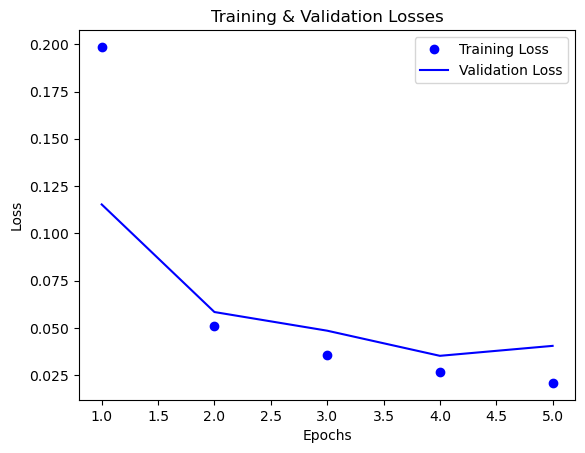

In [37]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\assignment06PNG')
plt.show()

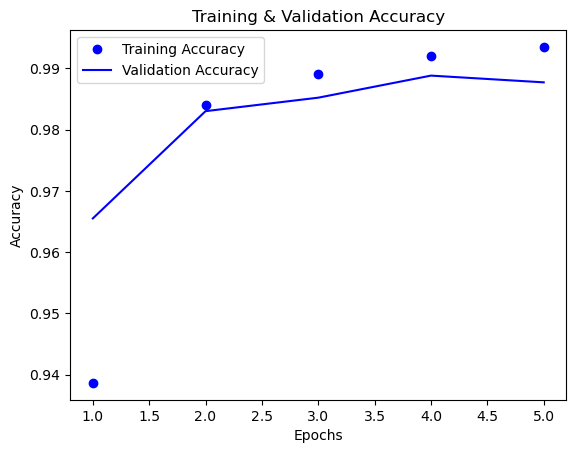

In [36]:
#Accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epcohs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, train_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\accuracyPNG')
plt.show()

In [39]:
# retrain model & evaluate for 3 epochs
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 3, batch_size = 64)
results = model.evaluate(test_images, test_labels)

Epoch 1/3
938/938 [==============================] - 25s 25ms/step - loss: 0.0116 - accuracy: 0.9965
Epoch 2/3
938/938 [==============================] - 25s 26ms/step - loss: 0.0092 - accuracy: 0.9973
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.0435 - accuracy: 0.9911


In [40]:
results

[0.043479882180690765, 0.991100013256073]

In [42]:
#Loss and accuracy
history.history

{'loss': [0.011624673381447792, 0.009243286214768887, 0.007589162793010473],
 'accuracy': [0.9964666962623596, 0.9973499774932861, 0.9979833364486694]}

In [43]:
model.save(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\6-1-model.h5')

In [44]:
prediction_results = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [45]:
prediction_results

array([[8.4818215e-13, 1.4013637e-12, 7.9418064e-13, ..., 1.0000000e+00,
        7.1448720e-14, 8.8554679e-13],
       [1.0670370e-12, 3.0961589e-13, 1.0000000e+00, ..., 6.2001581e-20,
        6.3564592e-16, 4.9383507e-21],
       [3.2855095e-15, 1.0000000e+00, 1.3975719e-14, ..., 2.2907494e-10,
        2.7650401e-12, 3.6749812e-15],
       ...,
       [1.0209669e-26, 6.3787823e-16, 4.9082052e-22, ..., 2.7280451e-16,
        3.5719909e-18, 1.6070612e-15],
       [2.5390151e-14, 3.2301263e-19, 7.8710421e-22, ..., 3.7945682e-18,
        2.5481697e-07, 1.1942707e-15],
       [2.1948858e-13, 5.9157579e-20, 4.1198930e-18, ..., 8.3996679e-24,
        2.9717780e-16, 5.2695157e-21]], dtype=float32)

In [46]:
with open(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\6-1-metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))

In [47]:
preds = pd.DataFrame(prediction_results,
                     columns = ['0','1','2','3','4','5','6','7','8','9'])

preds.to_csv(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\6-1-predicitons.csv', index = False)

# Assignment part 2

In [48]:
#importing cifar10
from keras.datasets import cifar10

In [50]:
#Splitting data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [51]:
# preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# put 10,000 aside for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [52]:
# Create the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# view summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 64)        

In [54]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100,
                    validation_data = (x_val, y_val), verbose=0)

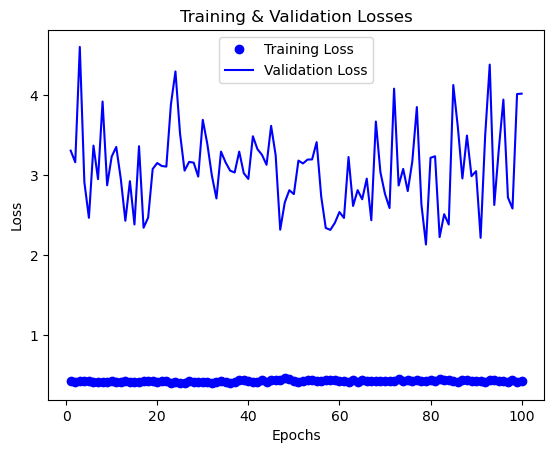

In [55]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\6-2A-Loss.png')
plt.show()

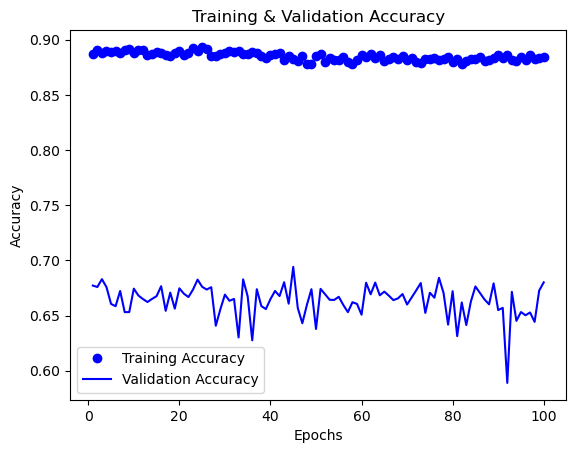

In [56]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epcohs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, train_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\6-2A-Accuracy')
plt.show()

In [57]:
# retrain model & evaluate
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)
results = model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 0.8312 - accuracy: 0.7800
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7477 - accuracy: 0.7891
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7026 - accuracy: 0.7936
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6806 - accuracy: 0.7970
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6500 - accuracy: 0.8025
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6398 - accuracy: 0.8050
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6412 - accuracy: 0.8010
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6225 - accuracy: 0.8078
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6123 - accuracy: 0.8088
Epoch 10/10
313/313 [==============================] - 3s 8ms/st

In [59]:
model.save(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\6-2A-model.h5')

In [60]:
prediction_results = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [61]:
prediction_results

array([[4.21460310e-04, 1.52559573e-04, 2.89890799e-03, ...,
        1.02881808e-04, 2.96914834e-03, 1.25233841e-04],
       [6.28627837e-04, 3.70398047e-04, 3.56287654e-16, ...,
        1.48146096e-14, 9.99000967e-01, 1.30031585e-08],
       [5.94272576e-02, 1.90348569e-02, 2.61096051e-04, ...,
        8.35009923e-05, 9.08882439e-01, 8.88891425e-03],
       ...,
       [3.65121878e-07, 4.80077063e-08, 3.01973009e-03, ...,
        1.10382631e-01, 4.64879292e-07, 1.73881290e-05],
       [9.73920669e-06, 3.36405193e-03, 1.74554007e-03, ...,
        7.68269529e-04, 3.40715123e-09, 3.31380056e-06],
       [4.94112008e-11, 1.59739350e-18, 7.89580952e-08, ...,
        9.99655366e-01, 5.83787319e-19, 4.79023188e-18]], dtype=float32)

In [62]:
#Writing results in text file
with open(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\6-2A-metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))

In [63]:
preds = pd.DataFrame(prediction_results,
                     columns = ['0','1','2','3','4','5','6','7','8','9'])

preds.to_csv(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\6-2A-predicitons.csv', index = False)

In [1]:
#Part 2 B

In [2]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
# preprocess data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# put 10,000 aside for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train2 = x_train[:-10000]
y_train2 = y_train[:-10000]

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train2, y_train2, batch_size=32)

validation_generator = train_datagen.flow(x_val, y_val, batch_size=32)

In [8]:
from keras import models
from keras import layers

In [9]:
# instantiate the model
# add dropout layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# view summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [11]:
from keras import optimizers

In [12]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\spashtunyar\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(x_train2) / 32,
                              epochs = 30,
                              validation_data=validation_generator,
                              validation_steps=len(x_val) / 32)

C:\Users\spashtunyar\AppData\Local\Temp\ipykernel_17548\7325378.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
1250/1250 [==============================] - 120s 94ms/step - loss: 2.1608 - accuracy: 0.1845 - val_loss: 2.0044 - val_accuracy: 0.2605
Epoch 2/30
1250/1250 [==============================] - 93s 74ms/step - loss: 1.9819 - accuracy: 0.2599 - val_loss: 1.9174 - val_accuracy: 0.2897
Epoch 3/30
1250/1250 [==============================] - 68s 54ms/step - loss: 1.9184 - accuracy: 0.2846 - val_loss: 1.8656 - val_accuracy: 0.3120
Epoch 4/30
1250/1250 [==============================] - 65s 52ms/step - loss: 1.8616 - accuracy: 0.3105 - val_loss: 1.8000 - val_accuracy: 0.3407
Epoch 5/30
1250/1250 [==============================] - 57s 45ms/step - loss: 1.8219 - accuracy: 0.3250 - val_loss: 1.7632 - val_accuracy: 0.3502
Epoch 6/30
1250/1250 [==============================] - 52s 42ms/step - loss: 1.7886 - accuracy: 0.3350 - val_loss: 1.7230 - val_accuracy: 0.3763
Epoch 7/30
1250/1250 [==============================] - 51s 41ms/step - loss: 1.7531 - accuracy: 0.3530 - val_loss: 1.6938 

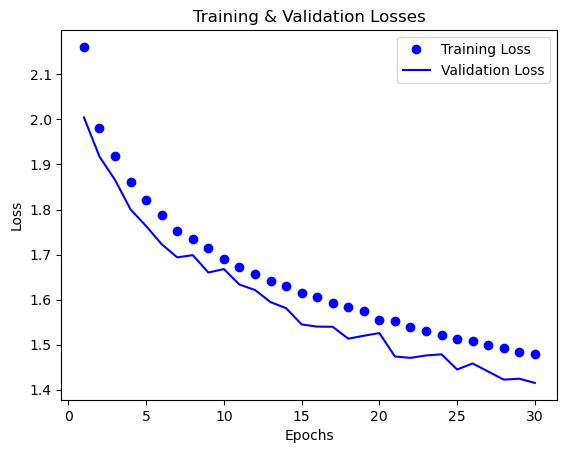

In [16]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training & Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\results\6-2B-Loss.png')
plt.show()

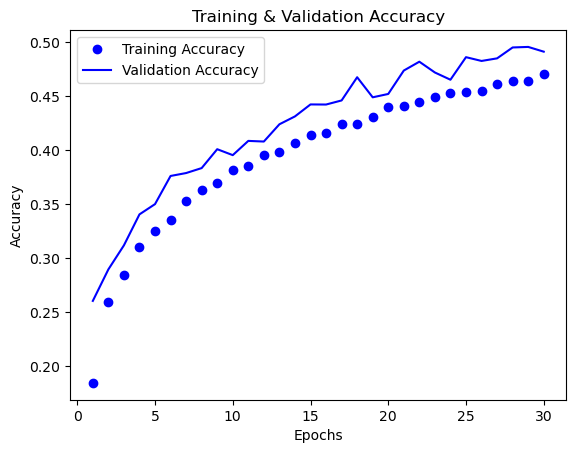

In [17]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epcohs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, train_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\results\6-2B-Accuracy')
plt.show()

In [18]:
# retrain model & evaluate
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=len(x_train) / 32,
                              epochs = 16)

results = model.evaluate(x_test, y_test)

Epoch 1/16


C:\Users\spashtunyar\AppData\Local\Temp\ipykernel_17548\740027706.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


1562/1562 [==============================] - 40s 25ms/step - loss: 1.4771 - accuracy: 0.4714
Epoch 2/16
1562/1562 [==============================] - 44s 28ms/step - loss: 1.4708 - accuracy: 0.4739
Epoch 3/16
1562/1562 [==============================] - 47s 30ms/step - loss: 1.4596 - accuracy: 0.4778
Epoch 4/16
1562/1562 [==============================] - 47s 30ms/step - loss: 1.4533 - accuracy: 0.4809
Epoch 5/16
1562/1562 [==============================] - 48s 31ms/step - loss: 1.4405 - accuracy: 0.4825
Epoch 6/16
1562/1562 [==============================] - 51s 33ms/step - loss: 1.4372 - accuracy: 0.4871
Epoch 7/16
1562/1562 [==============================] - 54s 34ms/step - loss: 1.4341 - accuracy: 0.4861
Epoch 8/16
1562/1562 [==============================] - 54s 35ms/step - loss: 1.4223 - accuracy: 0.4940
Epoch 9/16
1562/1562 [==============================] - 55s 35ms/step - loss: 1.4236 - accuracy: 0.4905
Epoch 10/16
1562/1562 [==============================] - 55s 35ms/step - lo

In [19]:
model.save(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\results\6-2B_model.h5')

In [20]:
prediction_results = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [21]:
prediction_results

array([[9.0042595e-13, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.8758386e-21],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2673316e-34, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [22]:
with open(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\results\6-2B-metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))

In [23]:
preds = pd.DataFrame(prediction_results,
                     columns = ['0','1','2','3','4','5','6','7','8','9'])

preds.to_csv(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\results\6-2B-predicitons.csv', index = False)

# Part 3

In [24]:
!pip install opencv-python

     --------------------------------------- 38.2/38.2 MB 23.4 MB/s eta 0:00:00


In [47]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import os, cv2
import matplotlib.pyplot as plt

In [48]:
# Load Model
model = ResNet50(weights = 'imagenet')

In [49]:
img_path = r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\results'

In [50]:
images = os.listdir(img_path)

In [51]:
# Get the filename for each image
for i, name in enumerate(images):
    print(name)

6-1-metrics.txt
6-1-model.h5
6-1-predicitons.csv
6-2A-Accuracy.png
6-2A-Loss.png
6-2A-metrics.txt
6-2A-model.h5
6-2A-predicitons.csv
6-2B-Accuracy.png
6-2B-Loss.png
6-2B-metrics.txt
6-2B-predicitons.csv
6-2B_model.h5
accuracyPNG.png
assignment06PNG.png
image.txt


In [54]:
# Write the predictions into a file
for i,name in enumerate(images):
    
    if name != '.ipynb_checkpoints':
        img = cv2.imread(img_path + '/' + name)
        img = cv2.resize(img, (224,224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        preds = model.predict(x)
        
        decpr = name, decode_predictions(preds, top=3)[0]
        
        print(decpr)

        with open(r'C:\Users\spashtunyar\Documents\School\dsc650\dsc650\assignments\assignment06\results\6-3-predictions.txt', 'w') as f:
            f.write(decpr[0])
    else:
        pass

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [55]:
#unsure here